# Gaussian mixture models

Assumes the data is generated from underlying gaussian distributions.

Parameter selection:

* n_components: The number of mixture components (gaussians to compare). Can be determined using the Bayesian Information Criterion (BIC) method.
* The rest are left by default

Returns (attributes):
* weights_: The weights of each mixture component.

* means_: The mean of each mixture component.

* covariances_: The covariance of each mixture component. The shape depends on covariance_type:

* precisions_: The precision matrices for each component in the mixture. A precision matrix is the inverse of a covariance matrix. 

* precisions_cholesky_: The cholesky decomposition of the precision matrices of each mixture component. 

* converged_: True when convergence was reached in fit(), False otherwise.

* n_iter_: Number of step used by the best fit of EM to reach the convergence.

* lower_bound_: Lower bound value on the log-likelihood (of the training data with respect to the model) of the best fit of EM

In [1]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
path = '/Users/andrewbailey/PycharmProjects/read_clustering/tests/test_files/native_cbf5_gal.csv'

native = VariantCall(path)

/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
list_18 = native.get_contig_positions('RDN18-1')
list_25 = native.get_contig_positions('RDN25-1')

# Determine n_components

As described in https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb


*Bayesian Information Criterion (BIC)*

* Estimates how good the GMM is when predicting the actual dataset. The lower, the better.

* The value normally decreases as the number of components increases.

* It is more useful to look at its gradient curve. The optimal value is one after which the gradient does not change significantly 


/Users/andrewbailey/anaconda3/envs/read_clustering/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


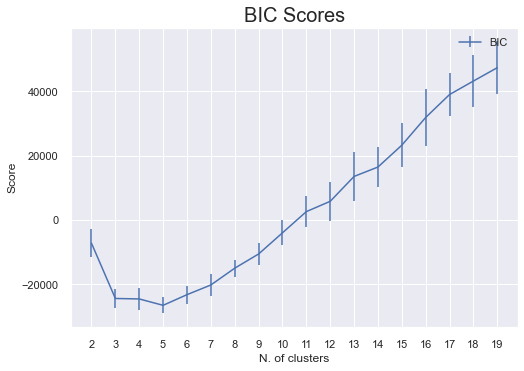

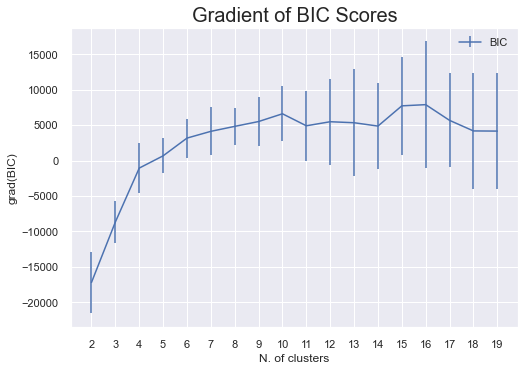

In [3]:
native.BIC(list_18)

For 18S, 7 is an optimal number of clusters.

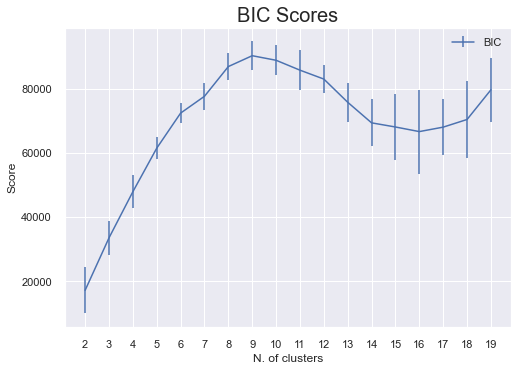

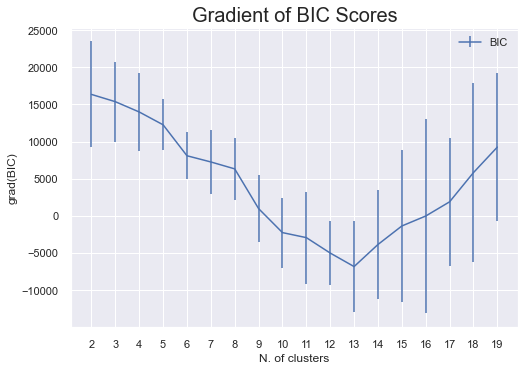

In [4]:
native.BIC(list_25)  

Although there is no clear pattern, for 25S an optimal number could be between 4 and 6.

Plotting with selected parameters:

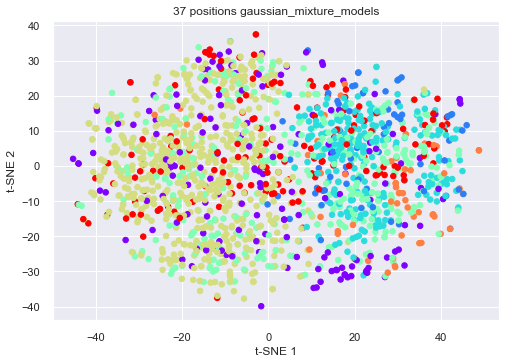

In [5]:
#18S
native.plot_tSNE_reads_covering_positions_data(list_18, 'gaussian_mixture_models', n_clusters = 7) 

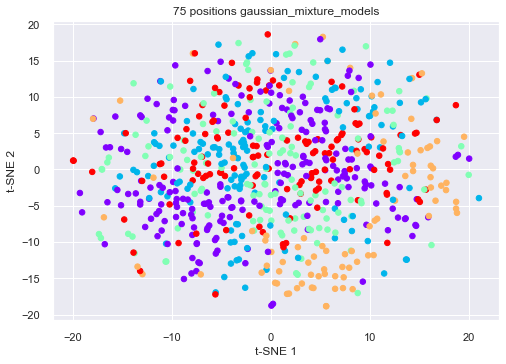

In [6]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'gaussian_mixture_models', n_clusters=5) 